  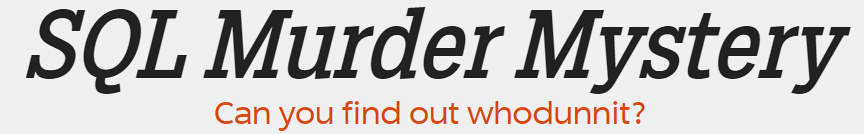

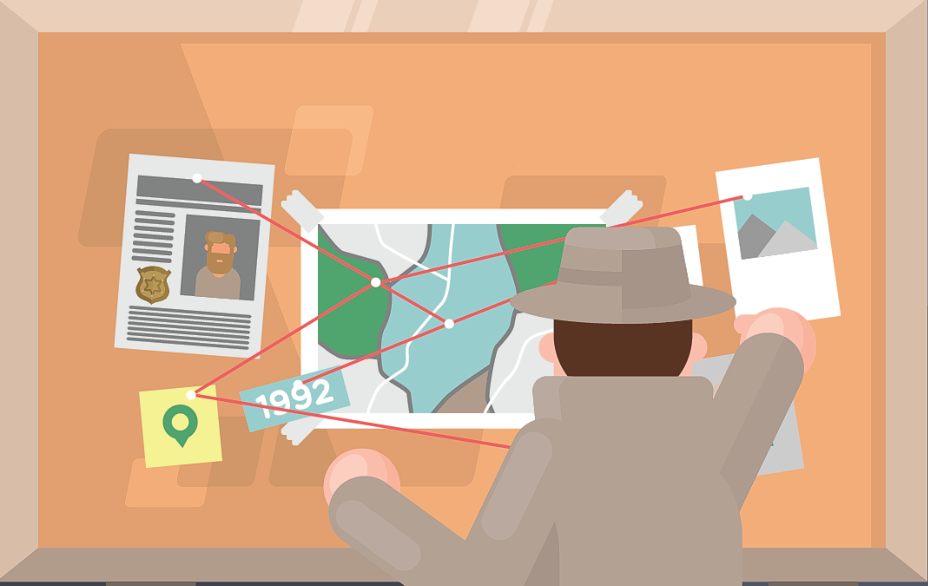

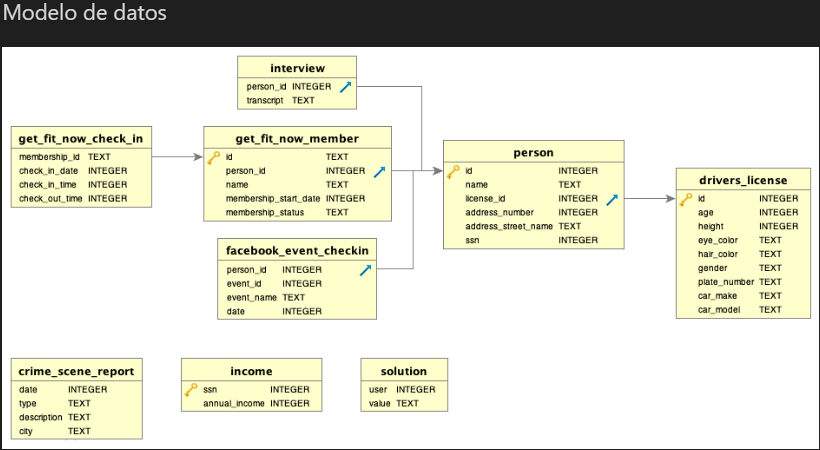

In [6]:
#importamos librerias
import pandas as pd
import sqlite3 


In [7]:
#establecemos coenxion a la BBDD
connection = sqlite3.connect("./data/sql-murder-mystery.db")

In [8]:
#creamos el cursor
cursor_team= connection.cursor()

 consultas SQL usadas para reolver el caso

In [10]:
#consulta datos policiales sobre delitos cometidos en la ciudad
query1 = ''' 
SELECT *		
FROM crime_scene_report		
where city LIKE 'SQL city'		
	
'''
cursor_team.execute(query1)

df_delitos = pd.read_sql(query1, connection)
df_delitos

,date,type,description,city
0,20180215,murder,REDACTED REDACTED REDACTED,SQL City
1,20180215,murder,Someone killed the guard! He took an arrow to ...,SQL City
2,20170712,theft,"A lone hunter stalks the night, firing arrows ...",SQL City
3,20170820,arson,"Wield the Hammer of Sol with honor, Titan, it ...",SQL City
4,20171110,robbery,The Gjallarhorn shoulder-mounted rocket system...,SQL City
5,20180103,bribery,"Apparently, Cayde thought it necessary to expo...",SQL City
6,20180115,assault,"Hamilton: Lee, do you yield? Burr: You shot hi...",SQL City
7,20180115,assault,Report Not Found,SQL City
8,20180115,murder,Security footage shows that there were 2 witne...,SQL City


In [ ]:
# se evidencia la existencia de 2 testigos directos a traves del visionado de camaras, vamos a investigar y tratar de saber quienes son:

1. **GESTIONES CON EL PRIMER TESTIGO**

In [38]:
# A traves de los datos pàrciales , que nos dice que vive en la ultima casa en Northwestern Dr, realizamos consulta por nombre y numero de carne de conducir en la tabla de personas donde el nombre de la calle contenga el dato
# parcial facilitado y ordenado por numero de la calle de manera descendente para que aparezca en primer lugar el ultimo numero, es decir, la ultima casa.

query2 = ''' 
SELECT name,license_id					
FROM person					
WHERE address_street_name LIKE '%Northwestern_D%'					
ORDER BY address_number DESC					
		
	
'''
cursor_team.execute(query2)

df_test1a = pd.read_sql(query2, connection)
df_test1a

,name,license_id
0,Morty Schapiro,118009
1,Lasonya Wildey,439686
2,Sophie Tiberio,957671
3,Torie Thalmann,773862
4,Coretta Cubie,303645
5,Cody Schiel,890431
6,Emmitt Aceuedo,916706
7,Leonora Wolfsberger,215868
8,Freddie Ellzey,267882
9,Boris Bijou,664914


In [ ]:
# el primero de la lista es nuestro primer testigo Morty Schapiro con numero de carne de conducir 118009

In [12]:
# consultamos datos a traves de la licencia de conduccion

query3 = ''' 
SELECT *		
FROM drivers_license		
WHERE id LIKE 118009		
	
'''
cursor_team.execute(query3)

df_test1b = pd.read_sql(query3, connection)
df_test1b

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,118009,64,84,blue,white,male,00NU00,Mercedes-Benz,E-Class


In [13]:
# conslutamos en la tabla personas para saber mas datos perosnales, verificnado su direccion y su id personal

query4 = ''' 
SELECT *			
  FROM person			
  WHERE license_Id LIKE 118009			
	
	
'''
cursor_team.execute(query4)

df_test1c = pd.read_sql(query4, connection)
df_test1c

,id,name,license_id,address_number,address_street_name,ssn
0,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949


In [14]:
#consultamos en entrevistas que haya podido realizarle la policia a traves de su id personal, extrayendo una serie de datos importantes: el autor es un varon, que portba una bolsa del gimnasio"fit gym" con el numero que 
#comenzaba por 48Z, y que solo los miembros Gold tienen esas bolsas. La matricula del coche donde huyo el autor contenia los caracteres H42W.
query5 = ''' 
SELECT *		
  FROM interview		
  WHERE person_Id LIKE 14887		

'''
cursor_team.execute(query5)

df_test1d = pd.read_sql(query5, connection)
df_test1d


,person_id,transcript
0,14887,I heard a gunshot and then saw a man run out. ...


In [15]:
# consulta al registo del gimnasio del autor,  donde constan los nuemros de socios por datos parciales, verificando que el autor es miembro del gimnasio
query6 = ''' 
SELECT *			
  FROM get_fit_now_check_in			
  WHERE membership_id LIKE '%48Z%'			

'''
cursor_team.execute(query6)

df_test1e = pd.read_sql(query6, connection)
df_test1e

,membership_id,check_in_date,check_in_time,check_out_time
0,48Z38,20170611,813,1122
1,48Z38,20171212,1150,1153
2,48Z38,20170820,919,921
3,48Z38,20180314,315,1150
4,48Z38,20170120,482,1138
5,48Z7A,20180109,1600,1730
6,48Z55,20180109,1530,1700


In [16]:
# comsulta por datos parciales de la matricula del vehciulo del autor, extrayendo 3 vehiculos con esos datos parciales y nos quedaremos en principio con los vehuclos cuyos titulares son hombres, aunque no se puede descartar la 
# idea que una mujer puede vestirse como un hombre para cometer un delito. 
query7 = ''' 
SELECT *			
  FROM drivers_license			
  WHERE plate_number LIKE '%H42W%'			

'''
cursor_team.execute(query7)

df_test1f = pd.read_sql(query7, connection)
df_test1f


,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,183779,21,65,blue,blonde,female,H42W0X,Toyota,Prius
1,423327,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS
2,664760,21,71,black,black,male,4H42WR,Nissan,Altima


In [18]:
# consultamos por numero de licencia de conducir, obtenemos id personal nombre y direccion
query8 = ''' 
			
  SELECT *			
  FROM person			
  WHERE license_id LIKE 423327			

'''
cursor_team.execute(query8)

df_test1g = pd.read_sql(query8, connection)
df_test1g

,id,name,license_id,address_number,address_street_name,ssn
0,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279


In [19]:
# consultamos por numero de licencia de conducir, obtenemos id personal nombre y direccion
query9 = ''' 
SELECT *			
  FROM person			
  WHERE license_id LIKE 664760				

'''
cursor_team.execute(query9)

df_test1h = pd.read_sql(query9, connection)
df_test1h

,id,name,license_id,address_number,address_street_name,ssn
0,51739,Tushar Chandra,664760,312,Phi St,137882671


In [20]:
#caracteristicas fisicas de ambos posibles autores( 30 años, 70 kg,  pelo y ojos marrones y su coche)
query10 = ''' 
SELECT *		
  FROM drivers_license		
  WHERE id LIKE 423327		

'''
cursor_team.execute(query10)

df_test1i = pd.read_sql(query10, connection)
df_test1i

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,423327,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS


In [21]:
#caracteristicas fisicas de ambos posibles autores( 21 años, 71 kg,  pelo y ojos negros y su coche)
query11 = ''' 
SELECT *		
  FROM drivers_license		
  WHERE id LIKE 664760		
	
'''
cursor_team.execute(query11)

df_test1j = pd.read_sql(query11, connection)
df_test1j

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,664760,21,71,black,black,male,4H42WR,Nissan,Altima


In [22]:
# consultamos por id personal los que sean miembros del gimnasio, siendo Jeremy miembro Gold del fit gym
query12 = ''' 
SELECT  *		
FROM get_fit_now_member		
WHERE person_id LIKE 67318		
	
'''
cursor_team.execute(query12)

df_test1k = pd.read_sql(query12, connection)
df_test1k

,id,person_id,name,membership_start_date,membership_status
0,48Z55,67318,Jeremy Bowers,20160101,gold


In [26]:
# consultamos por id personal los que sean miembros del gimnasio, no siendo miembro ( Jeremy acumula ya muchos indicios de criminalidad)
query13 = ''' 
SELECT  *		
FROM get_fit_now_member		
WHERE person_id LIKE 51739		

'''
cursor_team.execute(query13)

df_test1l = pd.read_sql(query13, connection)
df_test1l

,id,person_id,name,membership_start_date,membership_status


In [27]:
#cosnultamos entrevistas con la policia que pudiera haber tenido Jeremy, y encontramos una muy interesante donde habla de una mujer rica, 65 a 57 años, y con pelo pelirojo con un vehiculo Tesla Model 5, esta mujer asistio 
# 3 veces al conierto SQL simphony en diciembre de 2017,
query14 = ''' 
SELECT  *		
FROM interview		
WHERE person_id LIKE 67318		

'''
cursor_team.execute(query14)

df_test1m = pd.read_sql(query14, connection)
df_test1m

,person_id,transcript
0,67318,I was hired by a woman with a lot of money. I ...


In [28]:
# cobnsultamos nivel adquisitivo de Jeremy , teniendo rentas bajas
query15 = ''' 
SELECT  *		
FROM income		
WHERE ssn LIKE 871539279		
		
'''
cursor_team.execute(query15)

df_test1n = pd.read_sql(query15, connection)
df_test1n

,ssn,annual_income
0,871539279,10500


In [29]:
# cobnsultamos en eventos a Jeremy , habiendo asistiendo el 6/12/17 al concierto SQL simphony
query16 = ''' 
SELECT  *		
FROM facebook_event_checkin		
WHERE person_id LIKE 67318		
			
'''
cursor_team.execute(query16)

df_test1o = pd.read_sql(query16, connection)
df_test1o

,person_id,event_id,event_name,date
0,67318,4719,The Funky Grooves Tour,20180115
1,67318,1143,SQL Symphony Concert,20171206


In [31]:
# cjeremy, joven y sin dinero con una relacion con una mujer mayot rica... vamos a investigar a esta señora
# consultamos todos los datos de la personas que fueron al concierto SQL en la fecha que fue Jeremy.
query17 = ''' 
SELECT *		
FROM facebook_event_checkin		
WHERE event_id = 1143		
  AND DATE = 20171206		
			
'''
cursor_team.execute(query17)

df_test1p = pd.read_sql(query17, connection)
df_test1p

,person_id,event_id,event_name,date
0,69325,1143,SQL Symphony Concert,20171206
1,99716,1143,SQL Symphony Concert,20171206
2,67318,1143,SQL Symphony Concert,20171206


In [32]:
# consultamos por id peronal, las dos peronas que asistieron el dia que fue Jeremy al concierto( ya que Jeremy sale en la lista). el primero tiene nombre de hombre porlo que en principio descartado
query18 = ''' 
SELECT *		
FROM person		
WHERE id LIKE 69325		
		
'''
cursor_team.execute(query18)

df_test1q = pd.read_sql(query18, connection)
df_test1q

,id,name,license_id,address_number,address_street_name,ssn
0,69325,Tyson Ojard,142413,3187,Fletcher Way,609595066


In [33]:
# cobnsultamos la 2 persona que asistio el dia que fue Jeremy al concierto y aqui si tenemos a una mujer
query19 = ''' 
SELECT *		
FROM person		
WHERE id LIKE 99716		
		
'''
cursor_team.execute(query19)

df_test1r = pd.read_sql(query19, connection)
df_test1r

,id,name,license_id,address_number,address_street_name,ssn
0,99716,Miranda Priestly,202298,1883,Golden Ave,987756388


In [34]:
# cobnsultamos nivel adquisitivo de Miranda, la cual tiene ingresos muy altos
query20 = ''' 
SELECT *		
FROM income		
WHERE ssn LIKE 987756388		
			
'''
cursor_team.execute(query20)

df_test1s = pd.read_sql(query20, connection)
df_test1s

,ssn,annual_income
0,987756388,310000


In [35]:
# cobnsultamos que vehiculo tiene Miranda, y verificamos que tiene 68 años y un Tesla Model S
query21 = ''' 
SELECT *		
FROM drivers_license		
WHERE id LIKE 202298		
			
'''
cursor_team.execute(query21)
df_test1t = pd.read_sql(query21, connection)
df_test1t

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,202298,68,66,green,red,female,500123,Tesla,Model S


llegadoS a este punto hay indicios bastantes de crininalidad sobre Jeremy, un joven de 21 años, sin mucho dinero que se relaciona con una mujer muy mayor adinerada de la ciudad SQL. Vamos a perguntar al otro testigo y le 
ponemos la "ginda al pastel"

2. **GESTIONES CON EL SEGUNDO TESTIGO**

In [39]:
# conultamos por nombre licencia y callle por datos parciales, mostrando una lista de 44 registros , existiendo solo una chica llamda Annbel en el puesto 41: 41	Annabel Miller	490173
query22 = ''' 
SELECT name, license_id					
FROM person					
WHERE address_street_name LIKE '%Franklin%Ave%'					
ORDER BY address_number DESC					

'''
cursor_team.execute(query22)

df_test2a = pd.read_sql(query22, connection)
df_test2a

,name,license_id
0,Gema Nantz,273410
1,Edgar Mendieta,315790
2,Domenic Laun,971080
3,Cordell Lindamood,592762
4,Wilmer Casella,672050
5,Dante Eschen,218173
6,Whitney Herkenratt,138462
7,Noe Pancoast,895755
8,Graig Summy,192325
9,Candice Train,814779


In [37]:
# conultamos por numero de licencia de conduccion, verificando su domicilio y obteniendo su id personal
query23 = ''' 
SELECT *		
FROM person		
WHERE license_id LIKE 490173		
			
'''
cursor_team.execute(query23)
df_test2b = pd.read_sql(query23, connection)
df_test2b

,id,name,license_id,address_number,address_street_name,ssn
0,16371,Annabel Miller,490173,103,Franklin Ave,318771143


In [40]:
# consultamos entrevistas que hay podido tener con la policia por su id personal, obteniedno la guinda del astel, ya  que manifesto a la policia que reconocio al autor ya que lo vio mientras 
#practicaba deporte en el gimnasio la semana pasada, es decir, recientemente.
query24 = ''' 
SELECT *		
FROM interview		
WHERE person_id LIKE 16371		
				
'''
cursor_team.execute(query24)
df_test2c = pd.read_sql(query24, connection)
df_test2c

,person_id,transcript
0,16371,"I saw the murder happen, and I recognized the ..."


In [41]:
# verificamos su relato, y comprobamos que efectivamente es mienbro del gimnasio
query25 = ''' 
SELECT *		
FROM get_fit_now_member
WHERE person_id LIKE 16371	
			
'''
cursor_team.execute(query25)
df_test1d = pd.read_sql(query25, connection)
df_test1d

,id,person_id,name,membership_start_date,membership_status
0,90081,16371,Annabel Miller,20160208,gold


In [44]:
# verificamos si es cierto que estuvo en el gimnasio el 9 de enero donde vio al autor del homicidio
query26 = ''' 
SELECT *		
FROM get_fit_now_check_in
WHERE membership_id LIKE 90081	
			
'''
cursor_team.execute(query26)
df_test1e = pd.read_sql(query26, connection)
df_test1e

,membership_id,check_in_date,check_in_time,check_out_time
0,90081,20180109,1600,1700


In [47]:
# con esta consulta verificamos que el ralato de la 2 testigo en el reconimiento toma la consideracion necesaria para que este reconocimiento tenga consideracion de sin genero de dudasm a la espera dela realziacion del econcimiento fotografico y en rueda.
# ordenando la detencion de Jeremy como autor material y a Miranda como autora intelectual.
query27 = ''' 
SELECT *		
FROM get_fit_now_check_in
WHERE membership_id LIKE '48Z55'	
			
'''
cursor_team.execute(query27)
df_test1f = pd.read_sql(query27, connection)
df_test1f

,membership_id,check_in_date,check_in_time,check_out_time
0,48Z55,20180109,1530,1700


In [48]:
# comprobamos resultados en la pagina web del reto , siendo : 

. 1 PARTE

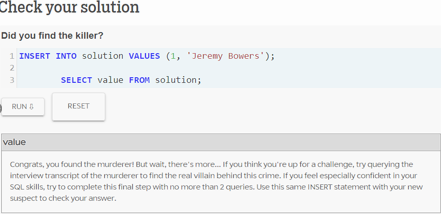

. 2 PARTE

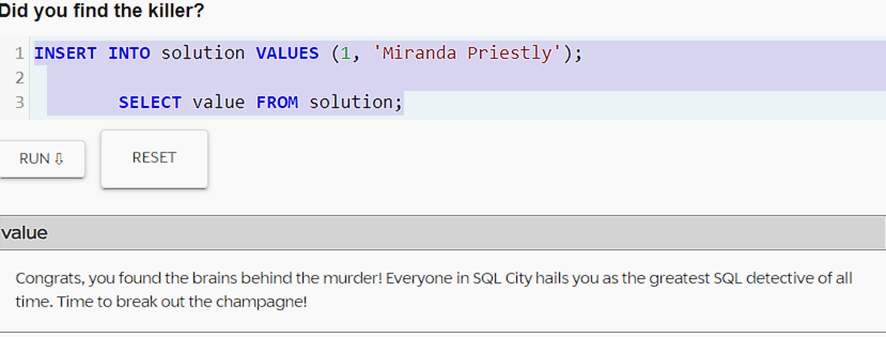